In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import scipy.integrate as scint
import scipy.stats as stats
import math
import statistics as st
import random

REG_ROUND = 4
SPEC_ROUND = 6

In [2]:
def zStatistic(confidence, tails='both'):
    zDist = stats.norm(0, 1).ppf
    zStatistic = zDist((1 - confidence) / 2)
    if(tails == 'both'):
        return zStatistic, -zStatistic
    if(tails == 'left'):
        return zStatistic
    return -zStatistic

def tStatistic(confidence, dOF, tails='both'):
    tDist = stats.t(dOF).ppf
    tStatistic = tDist((1 - confidence) / 2)
    if(tails == 'both'):
        return tStatistic, -tStatistic
    if(tails == 'left'):
        return tStatistic
    return -tStatistic

def confInterval(statistics, mean, n, std):
    marginErr = std / math.sqrt(n)
    conf_int = []
    for statistic in statistics:
        conf_int.append(mean + statistic * marginErr)
    return conf_int

def combinedTConfInterval(confidence, samp1, samp2, tails='both'):
    tStats = tStatistic(confidence, samp1.size + samp2.size - 2, tails=tails)
    sp = (((samp1.size - 1) * samp1.var(ddof=1)) + ((samp2.size - 1) * samp2.var(ddof=1))) / (samp1.size + samp2.size - 2)
    se = math.sqrt(sp) * math.sqrt((1 / samp1.size) + (1 / samp2.size))
    
    combMean = (samp1 - samp2).mean()
    conf_int = []
    for tStat in tStats:
        conf_int.append(combMean + tStat * se)
    return conf_int

def proportionInterval(confidence, p, n):
    zStats = zStatistic(confidence)
    se = math.sqrt((p * (1 - p)) / n)
    confInt = []
    for stat in zStats:
        confInt.append(p + (stat * se))
    return confInt

def combinedProportionInterval(confidence, p1, p2, n1, n2):
    zStats = zStatistic(confidence)
    se = math.sqrt(((p1 * (1 - p1)) / n1) + ((p2 * (1 - p2)) / n2))
    conf_int = []
    for stat in zStats:
        conf_int.append((p1 - p2) + stat * se)
    return conf_int
    

## Question 1

Since we know our Margin of Error = 2 = $\displaystyle Z_0.005 \cdot \frac{\sigma}{\sqrt{n}}$

We can first get our Z score by computing it below

In [18]:
z = zStatistic(.99, tails='right')

standardErr = 2
std = 5.8
n = (z * std / standardErr) ** 2
print(f'We need a sample size of at least: {math.ceil(n)} to have a margin of error of at most 2 months')

We need a sample size of at least: 56 to have a margin of error of at most 2 months


## Question 2

In [19]:
n = 100
mean = 23500
std = 3900
conf = .99

# do I use t or z statistic here?
zStats = zStatistic(conf)
tStats = tStatistic(conf, n)
# print(f'{round(zStats[0], REG_ROUND)}< x < {round(zStats[1], REG_ROUND)}')

interval = confInterval(zStats, mean, n, std)
print(f'A 99% confidence interval for average number of kilometers per year: {round(interval[0], REG_ROUND)} < μ < {round(interval[1], REG_ROUND)}')

A 99% confidence interval for average number of kilometers per year: 22495.4266 < μ < 24504.5734


**b**

Since we know our standard error is $\displaystyle \frac{\sigma}{\sqrt{n}} = \frac{3900}{\sqrt{100}} = \frac{3900}{10} = 390$

And our Z-Score is $\approx$ 2.57, then our margin of error = $Z_{\frac{\alpha}{2}} \cdot 390 = 1002.3$

So we can assert that the size of our error is 1002.3 with 99% confidence

## Question 3

Since we know that margin of error = $\displaystyle Z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt(n)}$

So we solve for $\displaystyle 15 =  Z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt(n)}$

Knowing that our confidence level is 95%, we can compute the $Z_{\frac{\alpha}{2}}$ value with code below

In [5]:
z = zStatistic(.95)[1]
print(round(z, REG_ROUND))

1.96


Plugging this into our formula, along with our values of $\sigma = 40$ we can get

$$
\begin{align*}
15 = Z_0.025 \cdot \frac{40}{\sqrt(n)}
\end{align*}
$$

Rearranging for n yields

$$
\begin{align*}
n &= (Z_0.025 \cdot \frac{40}{15})^2 \\ 
&= 27 \\
&\approx 28
\end{align*}
$$

So the n we would want to have would be 28 for our margin of error to be at most 15 seconds away from the true mean.

## Question 4

In [20]:
n = 20
confidence = .95
mean = 11.3
std = 2.45

tStats = tStatistic(confidence, n - 1)
interval = confInterval(tStats, mean, n, std)
print(f'95% confidence interval: {round(interval[0], REG_ROUND)}g < μ < {round(interval[1], REG_ROUND)}g')

95% confidence interval: 10.1534g < μ < 12.4466g


## Question 5

In [24]:
n = 12
samp1Mean = 36300
samp1Var = 5000 ** 2
samp2Mean = 38100
samp2Var = 6100 ** 2
CONFIDENCE = .95
degrees = round((((samp1Var + samp2Var) / n) ** 2) / ((((samp1Var / n)**2) / (n - 1)) + (((samp2Var / n)**2) / (n - 1))))
se = math.sqrt((samp1Var / n) + (samp2Var / n))
tStats = tStatistic(CONFIDENCE, degrees)

conf_int = []
for stat in tStats:
    conf_int.append((samp1Mean - samp2Mean) + stat * se)
print(f'A 95% confidence interval for μA - μB is: {round(conf_int[0], REG_ROUND)} < μA - μB < {round(conf_int[1], REG_ROUND)}')

A 95% confidence interval for μA - μB is: -6535.0239 < μA - μB < 2935.0239


## Question 6

In [7]:
sampA = np.array([3.5, 2.7, 3.9, 4.2, 3.6, 2.7, 3.3, 5.2, 4.2, 2.9, 4.4, 5.2, 4.0, 4.1, 3.4])
sampB = np.array([4.7, 3.9, 4.5, 5.5, 4.0, 5.3, 4.3, 6.0, 5.2, 3.7, 5.5, 6.2, 5.1, 5.4, 4.8])
CONFIDENCE = .95
interval = combinedTConfInterval(CONFIDENCE, sampB, sampA)
print(f'The 95% confidence interval for the difference of mean drying times is: {round(interval[0], REG_ROUND)} < μB - μA < {round(interval[1], REG_ROUND)}')

The 95% confidence interval for the difference of mean drying times is: 0.5465 < μB - μA < 1.6935


Because the confidence interval does not contain 0, this points to the populations being not equal.

## Question 7.

In [8]:
n = 200
nFor = 114
p = nFor / n
CONFIDENCE = .96
interval = proportionInterval(CONFIDENCE, p, n)

print(f'96% confidence interval for fraction of voting population favoring the suit: {round(interval[0], REG_ROUND)} < p < {round(interval[1], REG_ROUND)}')
standardError = zStatistic(CONFIDENCE, tails='right') * math.sqrt(.57 * .43 / n)
print(f'At 96% confidence, we can assure that our error will not be more than {round(standardError, REG_ROUND)}')

96% confidence interval for fraction of voting population favoring the suit: 0.4981 < p < 0.6419
At 96% confidence, we can assure that our error will not be more than 0.0719


## Question 8.

In [25]:
n = 500
n1For = 120
n2For = 98
CONFIDENCE = .9
interval = combinedProportionInterval(CONFIDENCE, n1For / n, n2For / n, n, n)
print(f'At 90% confidence, we can conclude that the difference between the non-innoculated rats and innoculated rats is: {round(interval[0], REG_ROUND)} < p1 - p2 < {round(interval[1], REG_ROUND)}')


At 90% confidence, we can conclude that the difference between the non-innoculated rats and innoculated rats is: 0.0011 < p1 - p2 < 0.0869


## Question 9.

In [26]:
popVar = 1
CONFIDENCE = .95
sample = np.array([1.9, 2.4, 3.0, 3.5, 4.2])

chi2 = stats.chi2(sample.size - 1).ppf
upper = chi2((1 - CONFIDENCE) / 2)
lower = chi2(1 - ((1 - CONFIDENCE) / 2))
numerator = (sample.size - 1) * sample.var(ddof=1)

print(f'Confidence interval of the battery life variance: {round(numerator / lower, REG_ROUND)} < σ^2 < {round(numerator / upper, REG_ROUND)}')

Confidence interval of the battery life variance: 0.2926 < σ^2 < 6.7297


At the 90% confidence level, the claimed variance is valid, since it falls within the range. However, we should consider getting a larger sample size.

## Question 10.

In [11]:
df = pd.read_csv('Table12.1.csv')
df = df.rename({'Stocks ': 'Stocks', 'Bonds ' : 'Bonds', 'Bills ': 'Bills'})
print(f'There are {df.shape[0]} observations and {df.shape[1]} columns')
df.head()

There are 88 observations and 4 columns


,Year,Stocks,Bonds,Bills
0,1926,0.1375,0.0569,0.0330
1,1927,0.3570,0.0658,0.0315
2,1928,0.4508,0.0115,0.0405
3,1929,-0.0880,0.0439,0.0447
4,1930,-0.2513,0.0447,0.0227


In [12]:
df['MRP'] = df['Stocks '] - df['Bills ']
df = df.drop(columns='Year')
df.head()

,Stocks,Bonds,Bills,MRP
0,0.1375,0.0569,0.0330,0.1045
1,0.3570,0.0658,0.0315,0.3255
2,0.4508,0.0115,0.0405,0.4103
3,-0.0880,0.0439,0.0447,-0.1327
4,-0.2513,0.0447,0.0227,-0.2740


In [13]:
means = [(colName, np.array(colData).mean()) for colName, colData in df.iteritems()]
variances = [(colName, np.array(colData).var()) for colName, colData in df.iteritems()]
stds = [(colName, np.array(colData).std()) for colName, colData in df.iteritems()]

for i in range(len(means)):
    print(f'{means[i][0]} -- Mean: {round(means[i][1], REG_ROUND): >6} -- Standard Deviation: {round(stds[i][1], REG_ROUND): >6} -- Variance: {round(variances[i][1], REG_ROUND): >6}')

Stocks  -- Mean: 0.1193 -- Standard Deviation: 0.2005 -- Variance: 0.0402
Bonds  -- Mean: 0.0581 -- Standard Deviation: 0.1027 -- Variance: 0.0106
Bills  -- Mean: 0.0365 -- Standard Deviation: 0.0312 -- Variance:  0.001
MRP -- Mean: 0.0828 -- Standard Deviation:  0.203 -- Variance: 0.0412


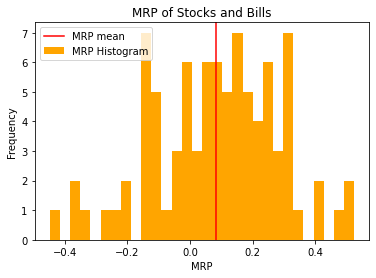

In [14]:
pp.hist(df['MRP'], bins=30,color='orange',label='MRP Histogram')
pp.axvline(means[3][1], color='red', label='MRP mean')
pp.title('MRP of Stocks and Bills')
pp.xlabel('MRP')
pp.ylabel('Frequency')
pp.legend(loc='upper left')
pp.show()

## Question 11.

In [28]:
random.seed(101)
n = 20
sample = random.choices(df['MRP'], k=n)
print(f'first 5 samples: {sample[:5]}')

first 5 samples: [-0.1261, 0.25, 0.1492, 0.0097, 0.19590000000000002]


In [29]:
print(f'MRP Population Variance: {round(variances[3][1], 5)}')
print(f'MRP Sample Mean: {round(np.mean(sample), 5)}')
print(f'MRP Sample Standard Variance: {round(np.var(sample, ddof=1), 5)}')

MRP Population Variance: 0.04121
MRP Sample Mean: 0.17641
MRP Sample Standard Variance: 0.03287


In [17]:
CONFIDENCE = .9
tStats = tStatistic(CONFIDENCE, n - 1)
se = np.std(sample, ddof=1) / math.sqrt(n)
me = tStats[1] * se
interval = confInterval(tStats, np.mean(sample), n, np.std(sample, ddof=1))
print(f'''Standard Error: {round(se, 5)}
Margin of Error: {round(me, 5)}
Confidence Interval: {round(interval[0], 5)} < μ < {round(interval[1], 5)}
''')

Standard Error: 0.04054
Margin of Error: 0.0701
Confidence Interval: 0.10631 < μ < 0.24651



No, this confidence interval excludes the population mean. This obviously is inconsistent with our actual computed popluation mean, and means we should probably take a larger sample.

## Misc ScratchWork

In [6]:
tStats = tStatistic(.95, 9)
print(tStats)
interval = confInterval(tStats, 73.1, 13.519, 10)
print(interval)

(-2.2621571627409915, 2.2621571627409915)
[66.9475160404714, 79.25248395952859]


In [9]:
mean = 16.6
std = 31.9
target = 200

zScore = (target - mean) / std
norm = stats.norm(0, 1).pdf
p = scint.quad(norm, zScore, np.inf)
print(p[0])

4.4829029305704506e-09
